In [24]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from plotnine import ggplot, aes, geom_raster, geom_tile, geom_point, geom_line, theme, labs, element_blank, ggsave

In [2]:
os.getcwd()

'/users/PCS0268/luchinsky/CS4170_FA2022_Final_Luchinsky/analysis'

## Debug Compare

In [3]:
#loading initial and 3diag matrices
inA = np.loadtxt("../Default/in_hA.txt")
outA = np.loadtxt("../Default/out_hA.txt")
n = outA.shape[0]
print("n=", n)

n= 50


In [4]:

# Eigenvalues
in_ev = np.sort(np.linalg.eig(inA)[0])          # initial
out_ev = np.sort(np.linalg.eig(outA)[0])        #  3diag
# comparing eigenvalues
c_ev = np.loadtxt("../Default/ev_out.txt")[:,1]
print("in_ev/out_ev = \t\t", in_ev/out_ev)
print()
print("in_ev/c_ev=\t\t", in_ev/c_ev)

in_ev/out_ev = 		 [1.00000006 0.99999966 0.99999861 1.00000041 0.99999897 1.00000039
 1.00000092 0.99999804 1.00000022 0.99999993 0.99999887 0.9999982
 1.00000304 0.99999883 0.99999903 1.00000052 1.00000188 0.99999865
 1.00000106 0.99999881 0.99999906 0.99999686 0.9999999  1.00000295
 0.99998586 1.00001384 1.0000131  1.00000225 0.99999899 1.00000158
 0.99999969 0.99999958 1.00000117 1.00000183 1.00000011 0.99999828
 1.00000022 1.00000037 1.00000176 1.00000003 1.00000134 1.00000059
 1.00000049 1.00000001 0.99999998 1.00000028 0.99999997 1.00000015
 1.00000009 1.00000097]

in_ev/c_ev=		 [1.00000104 0.99999868 0.99999862 1.00000059 1.00000044 0.9999992
 1.00000019 1.00000036 1.00000071 1.00000107 1.00000024 0.99999904
 1.00000223 0.99999808 0.99999694 1.00000053 0.99999969 0.99999816
 1.00000144 0.99999924 1.00000014 0.99999604 1.00000147 1.00001622
 1.0000025  1.00006173 1.00001092 1.00000199 1.00000148 1.00000093
 1.00000554 0.99999871 0.9999991  0.99999849 0.99999986 0.99999825
 1.0000

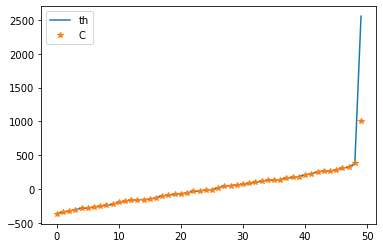

In [5]:
plt.plot(in_ev, label = "th")
plt.plot(c_ev, "*", label = "C")
plt.legend()

## Time Statistics

In [25]:
res  = pd.read_csv("../Default/results.csv", sep=" ")
res["time"] = res["tdTime"] + res["evTime"]
res

,N,p,tdTime,evTime,time
0,10,1,0.002079,0.002397,0.004476
1,10,2,0.001275,0.001454,0.002729
2,10,3,0.002071,0.002393,0.004464
3,10,4,0.001729,0.001533,0.003262
4,10,5,0.002188,0.001255,0.003443
...,...,...,...,...,...
65,100,3,76.915924,0.111900,77.027824
66,100,4,54.550441,0.077464,54.627905
67,100,5,43.862931,0.068595,43.931526
68,100,10,25.347805,0.076581,25.424386


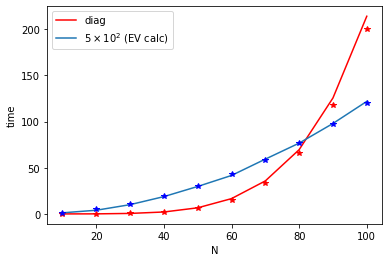

In [62]:
df1 = res.query("p==1")
Nlist = df1["N"].unique()
plt.plot(Nlist, df1["tdTime"], "-r", label="diag")
plt.plot(Nlist, 200*(Nlist/100)**5, "r*")

plt.plot(Nlist, 0.5*10**3*df1["evTime"], label = r"$5\times 10^{2}$ (EV calc)")
plt.plot(Nlist, 120*(Nlist/100)**2, "b*")

# plt.text(40, 100, r'$t\sim N^5$')
plt.xlabel("N")
plt.ylabel("time")
plt.legend()
plt.show()

In [75]:
def getStat(res, N, time_name="tdTime"):
    df = res.query("N=="+str(N))
    time = df[time_name]
    serial = float(df.query("p==1")[time_name])
    speedup = serial/df[time_name]
    eff = speedup/df["p"]
    KF  = (1/speedup - 1/df["p"])/(1-1/df["p"])
    return df["p"], time, speedup, eff, KF

## Speedup, Efficiency, etc

In [81]:
p, timeTD, speedupTD, effTD, KFTD  = getStat(res, N=50, time_name="tdTime")
_, timeEV, speedupEV, effEV, KFEV  = getStat(res, N=50, time_name="evTime")

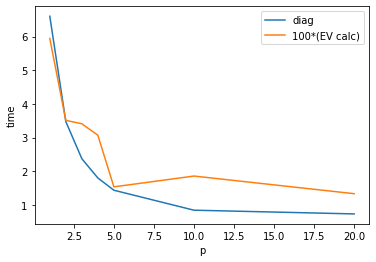

In [92]:
# Time vs p
plt.plot(p, timeTD, label = "diag")
plt.plot(p, 1e2*timeEV, label = "100*(EV calc)")
plt.xlabel("p")
plt.ylabel("time")
plt.legend()
plt.show()

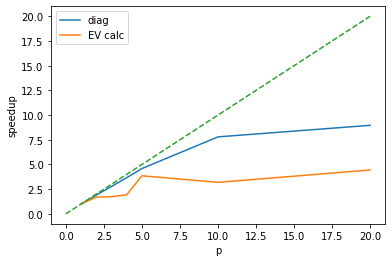

In [95]:
# speedup vs p
plt.plot(p, speedupTD, label = "diag")
plt.plot(p, speedupEV, label = "EV calc")
plt.plot([0,20], [0,20], "--")
plt.xlabel("p")
plt.ylabel("speedup")
plt.legend()
plt.show()

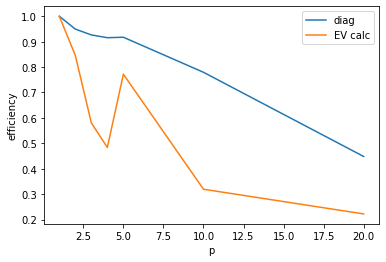

In [97]:
# efficiency vs p
plt.plot(p, effTD, label = "diag")
plt.plot(p, effEV, label = "EV calc")
plt.xlabel("p")
plt.ylabel("efficiency")
plt.legend()
plt.show()

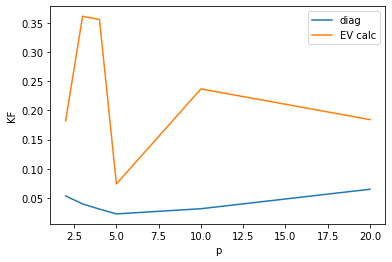

In [98]:
# KF vs p
plt.plot(p, KFTD, label = "diag")
plt.plot(p, KFEV, label = "EV calc")
plt.xlabel("p")
plt.ylabel("KF")
plt.legend()
plt.show()

## JM Progress Figures and Movies

In [7]:
# data_dir = '../results/sjResults/'
# file_names = os.listdir(data_dir + "/matrices/")
# nums = np.sort([int(s.split(".")[0]) for s in file_names])
# def plot_matrix(AA, n):
#     dfAA = pd.DataFrame(AA.reshape(AA.shape[0]*AA.shape[1]), columns=["value"])
#     dfAA["x"] = np.repeat(np.linspace(1,AA.shape[0]), AA.shape[0])
#     dfAA["y"] = np.tile(-np.linspace(1,AA.shape[0]), AA.shape[0])
#     p = (ggplot(dfAA, aes(x="x", y="y", fill="value")) + geom_tile() + 
#         theme(legend_position="none", axis_text_x=element_blank(), axis_text_y=element_blank()) + 
#         labs(x="", y="", title="Itteration " + str(nums[n]))
#     )
#     return p


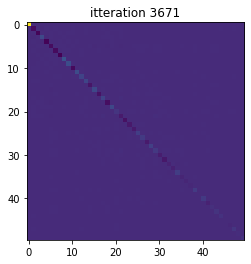

In [227]:
# build GIF
with imageio.get_writer("../results/sjResults/gifs_and_images/M.gif", mode = "I", fps=3, loop=1) as writer:
    for n in nums:
        AA = np.loadtxt("../results/sjResults/matrices/"+str(n)+".txt")
        plt.imshow(AA)
        plt.title("itteration " + str(n))
        plt.savefig("./A.jpeg")
        image = imageio.imread("./A.jpeg")
        writer.append_data(image)
        

In [194]:
from plotnine import ggplot, aes, geom_point, geom_line, ggsave, labs
import warnings
warnings.filterwarnings('ignore')

In [196]:
import tqdm

In [228]:
eigs = np.sort(np.linalg.eig(AA)[0])
with imageio.get_writer("../results/sjResults/gifs_and_images/EV.gif", fps=3, loop=1) as writer:
    for n in tqdm.tqdm(nums):
        AA = np.loadtxt("../results/sjResults/matrices/"+str(n)+".txt")
        df = pd.DataFrame( np.sort(np.diag(AA)), columns=["value"])
        df["i"] = np.linspace(1, AA.shape[0])
        df["true"] = eigs
        p = (
            ggplot(df,aes(x="i")) + geom_point(aes(y="value")) + geom_line(aes(y="true"), color="red") +
            labs(x="", y="", title="itteration " + str(n))
        )
        p.save("./B.jpeg")
        image = imageio.imread("./B.jpeg")
        writer.append_data(image)

#df["ev"] = np.sort(np.diag[AA])

100%|██████████| 81/81 [00:32<00:00,  2.48it/s]


## HouseHold GIFS

In [207]:
file_names = os.listdir("../results/hhResults/matrices/")
nums = np.sort([int(s.split(".")[0]) for s in file_names])
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

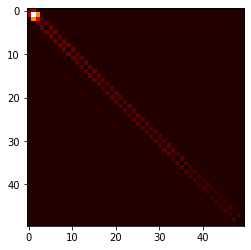

In [220]:
AA = np.loadtxt("../results/hhResults/matrices/"+str(47)+".txt")
# AA = (AA-np.min(AA))/(np.max(AA)-np.min(AA))
plt.imshow(AA, cmap="hot")

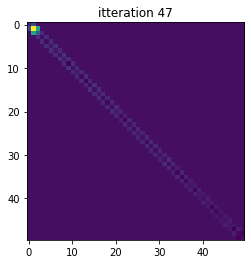

In [225]:
# build GIF
with imageio.get_writer("../results/hhResults/gifs_and_images/M.gif", mode = "I", fps=3, loop=1) as writer:
    for n in nums:
        AA = np.loadtxt("../results/hhResults/matrices/"+str(n)+".txt")
        plt.imshow(AA)
        plt.title("itteration " + str(n))
        plt.savefig("./A.jpeg")
        image = imageio.imread("./A.jpeg")
        writer.append_data(image)
        

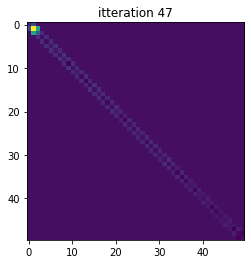

In [224]:
# build GIF
images = []
#with imageio.get_writer("../results/hhResults/gifs_and_images/M.gif", mode = "I") as writer:
for n in nums:
    AA = np.loadtxt("../results/hhResults/matrices/"+str(n)+".txt")
    plt.imshow(AA)
    plt.title("itteration " + str(n))
    plt.savefig("./A.jpeg")
    images.append(imageio.imread("./A.jpeg"))
imageio.mimsave("../results/hhResults/gifs_and_images/M.gif", images, fps = 3, loop = 1)
#writer.append_data(image)
        

In [230]:
from plotnine import geom_tile

In [243]:
dd = pd.DataFrame(AA)
pd.wide_to_long(dd, stubnames=dd.columns, i="x", j="value")

ValueError: stubname can't be identical to a column name

In [221]:
?imageio.get_writer

Signature: imageio.get_writer(uri, format=None, mode='?', **kwargs)
Docstring:
get_writer(uri, format=None, mode='?', **kwargs)

Returns a :class:`.Writer` object which can be used to write data
and meta data to the specified file.

Parameters
----------
uri : {str, pathlib.Path, file}
    The resource to write the image to, e.g. a filename, pathlib.Path
    or file object, see the docs for more info.
format : str
    The format to use to write the file. By default imageio selects
    the appropriate for you based on the filename.
mode : {'i', 'I', 'v', 'V', '?'}
    Used to give the writer a hint on what the user expects (default '?'):
    "i" for an image, "I" for multiple images, "v" for a volume,
    "V" for multiple volumes, "?" for don't care.
kwargs : ...
    Further keyword arguments are passed to the writer. See :func:`.help`
    to see what arguments are available for a particular format.
File:      ~/env/lib64/python3.6/site-packages/imageio/core/functions.py
Type:      func